In [1]:
!pip install pysentimiento==0.7.2

In [1]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")


In [7]:
analyzer.predict("Qué olor a mandarina")

AnalyzerOutput(output=NEG, probas={NEG: 0.740, NEU: 0.174, POS: 0.087})

In [2]:
#Hate Speech (misogyny & racism)

hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [18]:
hate_speech_analyzer.predict('hijo emigrant verg enza cubano peor astilla misma madera')

AnalyzerOutput(output=['hateful'], probas={hateful: 0.750, targeted: 0.049, aggressive: 0.403})

In [19]:
analyzer.predict('hijo emigrant verg enza cubano peor astilla misma madera')

AnalyzerOutput(output=NEG, probas={NEG: 0.898, NEU: 0.094, POS: 0.008})

In [15]:
import pandas as pd
df = pd.read_csv('C:/Users/Usuario/Desktop/ID BOOTCAMPS DS/PROGRAMACION/comentarios_inmigracion_procesados.csv')

In [17]:
df['comment_stem'][0]

'hijo emigrant verg enza cubano peor astilla misma madera'

In [31]:
def asignar_valor(elemento):
    if isinstance(elemento, str):
        resultado = analyzer.predict(elemento)
        if resultado.output == 'NEG':
            return -1
        elif resultado.output == 'NEU':
            return 0
        elif resultado.output == 'POS':
            return 1
        else:
            print(f"Output de sentimiento desconocido: {resultado.output}")
            return None  # Manejar otros casos si es necesario

# Aplicar la función a la columna 'comment_stem' y crear una nueva columna 'valor_asignado'
df['sentiment'] = df['comment_stem'].apply(lambda x: asignar_valor(x))

# Mostrar el DataFrame con la nueva columna


In [32]:
df.head()

,Unnamed: 0.1,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,0,0,0S9RKAhqQvs,UCgKKgbBri25DcpyniH4uwRw,Él es hijo de emigrante y para vergüenza de no...,[0. 0. 0. ... 0. 0. 0.],hijo emigrant verg enza cubano peor astilla mi...,-1.0
1,1,1,0S9RKAhqQvs,UCmtEIVdiYIuW7m1rqqtsgNw,Aunque a los politicamente correctos no les gu...,[0. 0. 0. ... 0. 0. 0.],aunqu politicament correcto gust dato dicen cu...,-1.0
2,2,2,0S9RKAhqQvs,UCxSy_-vrCi78iqxwMnYjhfw,No se. Trata de que si sus papas como llegaron...,[0. 0. 0. ... 0. 0. 0.],trata papa llegaron pongan atenc diciendo debe...,0.0
3,3,3,0S9RKAhqQvs,UCxSy_-vrCi78iqxwMnYjhfw,Así es,[0. 0. 0. ... 0. 0. 0.],NaN,NaN
4,4,4,0S9RKAhqQvs,UCmIPxcX0xEesuwcuIEM8B4Q,Mira….el burro hablando de orejas?,[0. 0. 0. ... 0. 0. 0.],mira burro hablando oreja,-1.0


In [39]:
df['sentiment'].value_counts()

 0.0    5738
-1.0    3294
 1.0    1345
Name: sentiment, dtype: int64

In [41]:
df[df['sentiment']==-1]

,Unnamed: 0.1,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,0,0,0S9RKAhqQvs,UCgKKgbBri25DcpyniH4uwRw,Él es hijo de emigrante y para vergüenza de no...,[0. 0. 0. ... 0. 0. 0.],hijo emigrant verg enza cubano peor astilla mi...,-1.0
1,1,1,0S9RKAhqQvs,UCmtEIVdiYIuW7m1rqqtsgNw,Aunque a los politicamente correctos no les gu...,[0. 0. 0. ... 0. 0. 0.],aunqu politicament correcto gust dato dicen cu...,-1.0
4,4,4,0S9RKAhqQvs,UCmIPxcX0xEesuwcuIEM8B4Q,Mira….el burro hablando de orejas?,[0. 0. 0. ... 0. 0. 0.],mira burro hablando oreja,-1.0
8,8,8,0S9RKAhqQvs,UC01_fyduUYIUpaEYlgUvs8Q,Que Buena ley cubanos se les acabo su salid...,[0. 0. 0. ... 0. 0. 0.],buena cubano acabo salidita acubaaa mira abusa...,-1.0
12,12,12,0S9RKAhqQvs,UCFrJmuq39GXFyZ1nYchLwZg,Pero. Si los rasistas republicanos en pesar...,[0. 0. 0. ... 0. 0. 0.],rasista republicano pesaron joder primero alo ...,-1.0
...,...,...,...,...,...,...,...,...
10700,10700,10700,uZQqU1Ikssk,UCvyzLly6EbgL0M4s6HkLvdQ,La dictadura esta preocupada parece que maduro...,[0. 0. 0. ... 0. 0. 0.],dictadura preocupada parec maduro habia promet...,-1.0
10701,10701,10701,uZQqU1Ikssk,UCwxtSBomPoJhbM1uoPT5UZw,Ya basta María Corina Machado tiene que elimin...,[0. 0. 0. ... 0. 0. 0.],basta corina machado eliminar cochinada bono b...,-1.0
10702,10702,10702,uZQqU1Ikssk,UC5WPDgYA_SalRjt4nEk_LjQ,Para acumular votos para las elecciones presid...,[0. 0. 0. ... 0. 0. 0.],acumular voto eleccion presidenci hacer trampa...,-1.0
10704,10704,10704,uZQqU1Ikssk,UCB2GPT4C34Qrq-OI3EuN_rA,"NUESTROS HIJOS, NIETOS y BISNIETOS, NUNCA LE P...",[0. 0. 0. ... 0. 0. 0.],hijo nieto bisnieto nunca perdonaran chavista ...,-1.0


In [48]:
def show_wordcloud(df, column_name):
    all_words = df[column_name].tolist()
    all_words_str = ' '.join([str(x) for x in all_words if str(x).lower()]) 

    # Define la fuente TrueType que quieres usar (asegúrate de que sea compatible)
    font_path = 'font.ttf'
    
    # Resto de tu código para procesar el texto y generar la WordCloud...
    wordcloud = WordCloud(
        width=2000,
        height=1000,
        random_state=1,
        background_color='black',
        colormap='viridis',
        font_path=font_path
    ).generate(all_words_str)
    
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

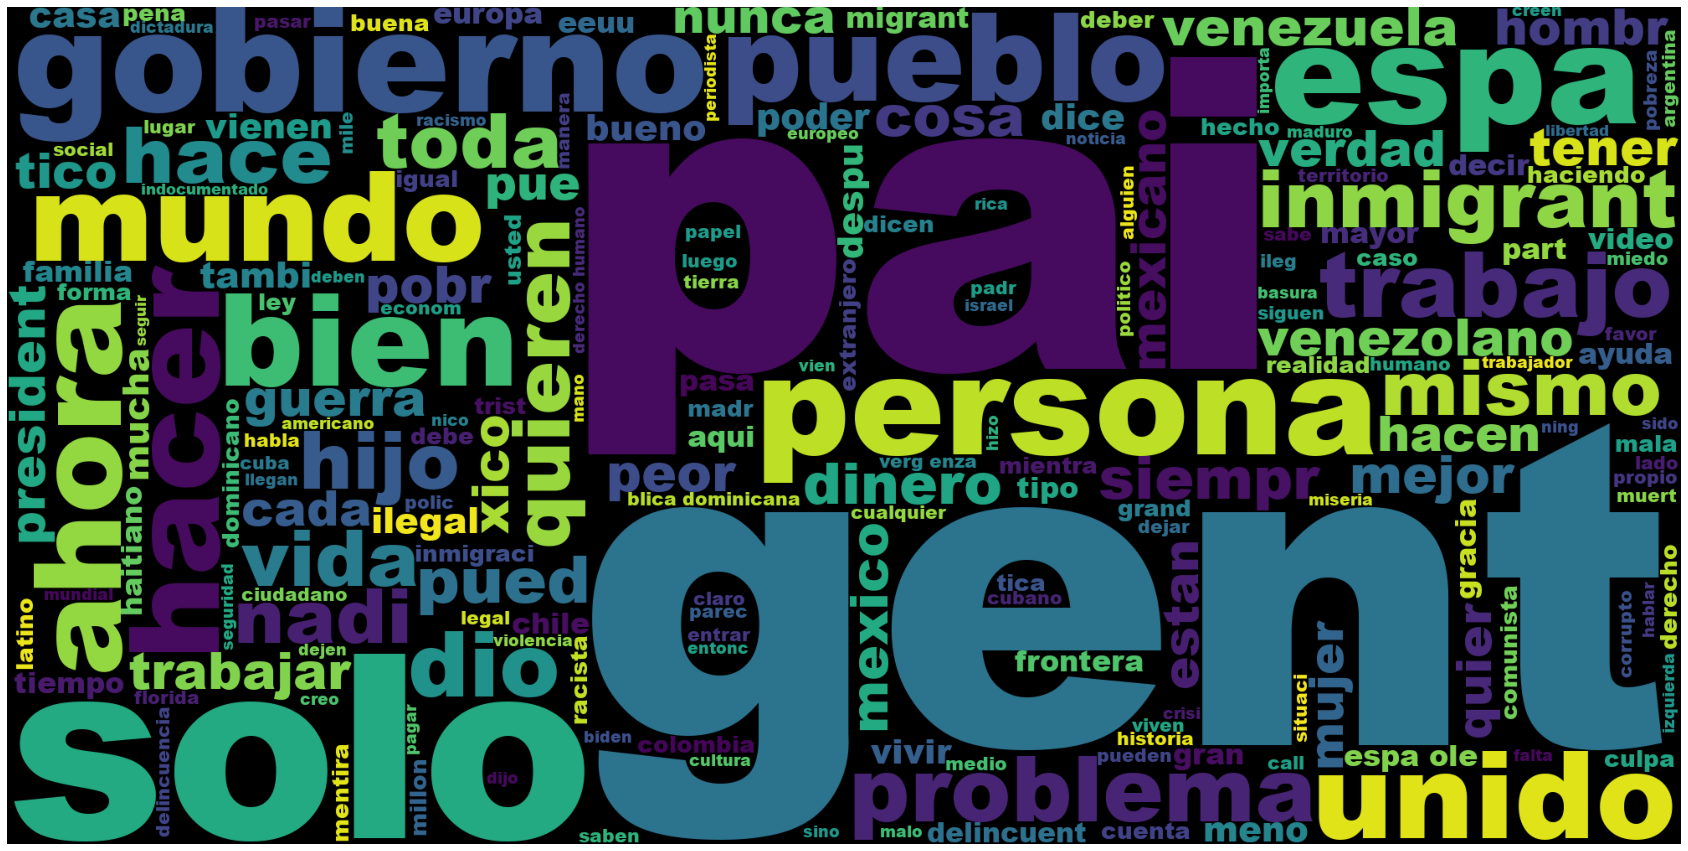

In [51]:
show_wordcloud(df[df['sentiment'] == -1], 'comment_stem')

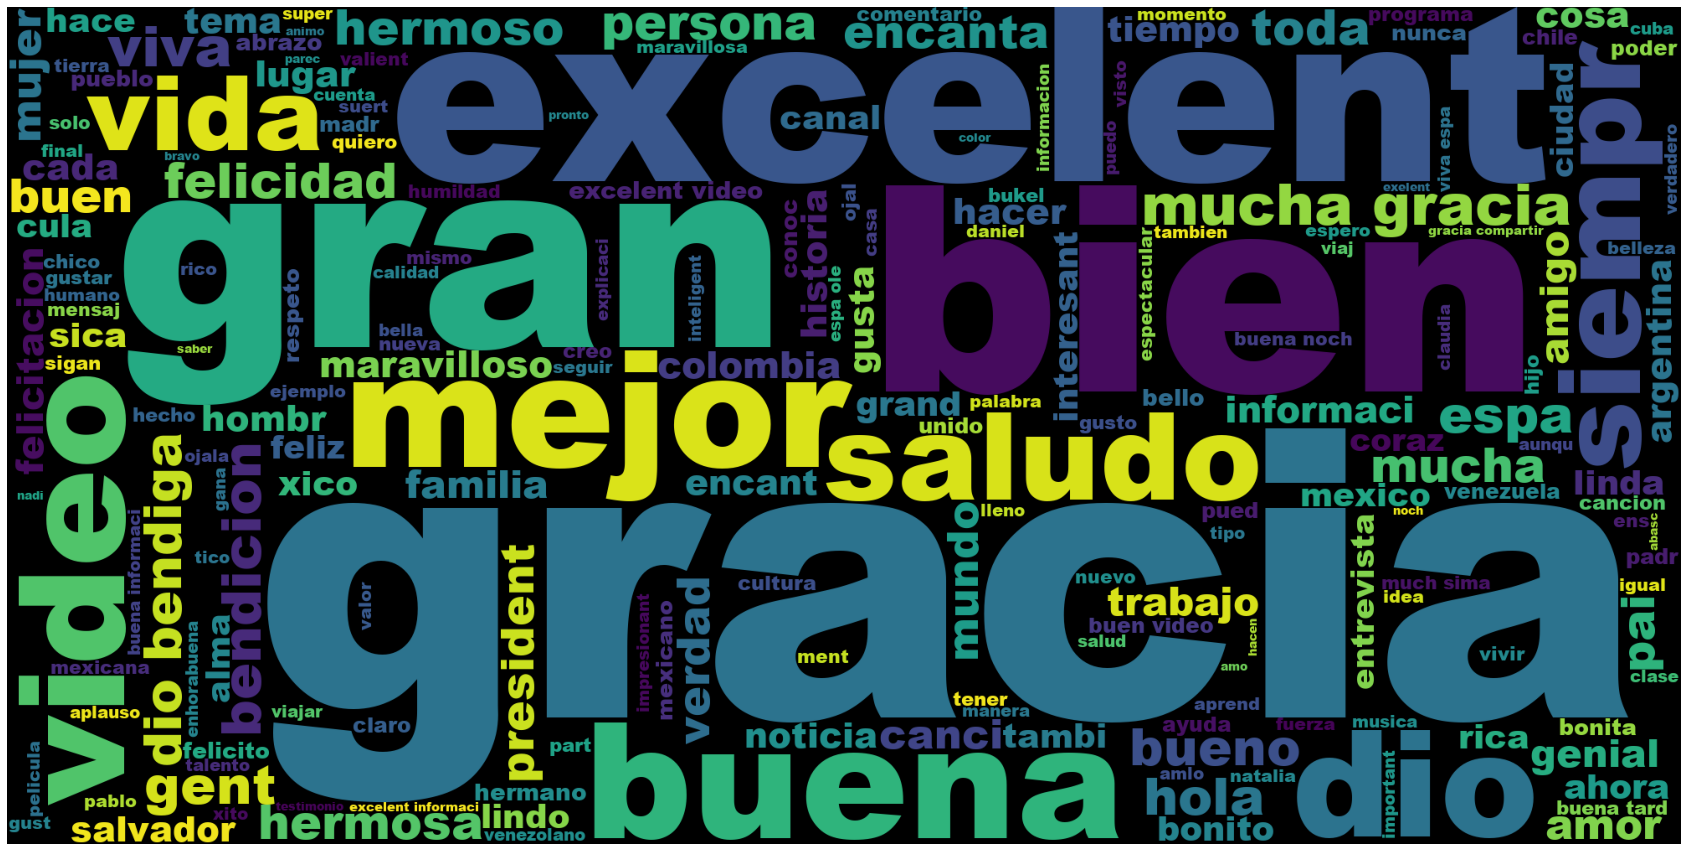

In [52]:
show_wordcloud(df[df['sentiment'] == 1], 'comment_stem')

In [53]:
df.to_csv('C:/Users/Usuario/Desktop/ID BOOTCAMPS DS/PROGRAMACION/comentarios_inmigracion_sentimiento.csv')

In [55]:
# Filtrar las filas donde 'sentiment' es igual a -1
df_neg = df[df['sentiment'] == -1]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neg = df_neg[columnas_deseadas].copy()

df_neg.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,0S9RKAhqQvs,UCgKKgbBri25DcpyniH4uwRw,Él es hijo de emigrante y para vergüenza de no...,[0. 0. 0. ... 0. 0. 0.],hijo emigrant verg enza cubano peor astilla mi...,-1.0
1,0S9RKAhqQvs,UCmtEIVdiYIuW7m1rqqtsgNw,Aunque a los politicamente correctos no les gu...,[0. 0. 0. ... 0. 0. 0.],aunqu politicament correcto gust dato dicen cu...,-1.0
4,0S9RKAhqQvs,UCmIPxcX0xEesuwcuIEM8B4Q,Mira….el burro hablando de orejas?,[0. 0. 0. ... 0. 0. 0.],mira burro hablando oreja,-1.0
8,0S9RKAhqQvs,UC01_fyduUYIUpaEYlgUvs8Q,Que Buena ley cubanos se les acabo su salid...,[0. 0. 0. ... 0. 0. 0.],buena cubano acabo salidita acubaaa mira abusa...,-1.0
12,0S9RKAhqQvs,UCFrJmuq39GXFyZ1nYchLwZg,Pero. Si los rasistas republicanos en pesar...,[0. 0. 0. ... 0. 0. 0.],rasista republicano pesaron joder primero alo ...,-1.0


In [56]:
df_neg.shape

(3294, 6)

In [57]:
df_neg.to_csv('C:/Users/Usuario/Desktop/ID BOOTCAMPS DS/PROGRAMACION/comentarios_negativos_inmigracion_ filtrados.csv')

In [5]:
import pandas as pd

In [7]:
df_neg = pd.read_csv('C:/Users/Usuario/Desktop/ID BOOTCAMPS DS/PROGRAMACION/comentarios_negativos_inmigracion_ filtrados.csv')

In [46]:
df_neg.shape

(3294, 10)

In [20]:
def hateful(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'hateful' está presente en las probabilidades
        if 'hateful' in resultado.probas:
            return resultado.probas['hateful']  # Devolver el valor de 'hateful'
        else:
            print(f"No se encontró 'hateful' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [21]:
df_neg['c_hateful'] = df_neg['comment_stem'].apply(lambda x: hateful(x))

In [47]:
df_neg['comment_stem'][2472]

'polic migraci dejan meter saben corren peligro'

In [48]:
hate_speech_analyzer.predict('polic migraci dejan meter saben corren peligro')

AnalyzerOutput(output=[], probas={hateful: 0.397, targeted: 0.005, aggressive: 0.148})

In [26]:
def targeted(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'targeted' está presente en las probabilidades
        if 'targeted' in resultado.probas:
            return resultado.probas['targeted']  # Devolver el valor de 'targeted'
        else:
            print(f"No se encontró 'targeted' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [27]:
df_neg['targeted'] = df_neg['comment_stem'].apply(lambda x: hateful(x))

In [28]:
def aggressive(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'aggressive' está presente en las probabilidades
        if 'aggressive' in resultado.probas:
            return resultado.probas['aggressive']  # Devolver el valor de 'aggressive'
        else:
            print(f"No se encontró 'aggressive' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [29]:
df_neg['aggresive'] = df_neg['comment_stem'].apply(lambda x: hateful(x))

In [30]:
df_neg.head()

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment,c_hateful,targeted,aggresive
0,0,0S9RKAhqQvs,UCgKKgbBri25DcpyniH4uwRw,Él es hijo de emigrante y para vergüenza de no...,[0. 0. 0. ... 0. 0. 0.],hijo emigrant verg enza cubano peor astilla mi...,-1.0,0.750493,0.750493,0.750493
1,1,0S9RKAhqQvs,UCmtEIVdiYIuW7m1rqqtsgNw,Aunque a los politicamente correctos no les gu...,[0. 0. 0. ... 0. 0. 0.],aunqu politicament correcto gust dato dicen cu...,-1.0,0.044048,0.044048,0.044048
2,4,0S9RKAhqQvs,UCmIPxcX0xEesuwcuIEM8B4Q,Mira….el burro hablando de orejas?,[0. 0. 0. ... 0. 0. 0.],mira burro hablando oreja,-1.0,0.034303,0.034303,0.034303
3,8,0S9RKAhqQvs,UC01_fyduUYIUpaEYlgUvs8Q,Que Buena ley cubanos se les acabo su salid...,[0. 0. 0. ... 0. 0. 0.],buena cubano acabo salidita acubaaa mira abusa...,-1.0,0.676415,0.676415,0.676415
4,12,0S9RKAhqQvs,UCFrJmuq39GXFyZ1nYchLwZg,Pero. Si los rasistas republicanos en pesar...,[0. 0. 0. ... 0. 0. 0.],rasista republicano pesaron joder primero alo ...,-1.0,0.936755,0.936755,0.936755


In [33]:
df_neg.aggresive

0       0.750493
1       0.044048
2       0.034303
3       0.676415
4       0.936755
          ...   
3289    0.402220
3290    0.147673
3291    0.033470
3292    0.068362
3293    0.048018
Name: aggresive, Length: 3294, dtype: float64

In [34]:
import matplotlib.pyplot as plt

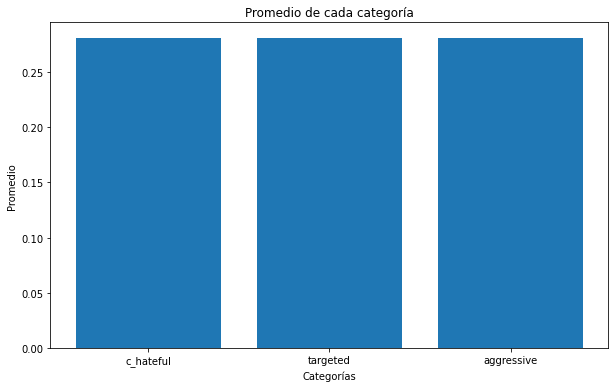

In [43]:
c_hateful = df_neg['c_hateful']
targeted = df_neg['targeted']
aggresive = df_neg['aggresive']

plt.figure(figsize=(10, 6))

plt.bar(['c_hateful', 'targeted', 'aggressive'], [c_hateful.mean(), targeted.mean(), aggresive.mean()])
plt.xlabel('Categorías')
plt.ylabel('Promedio')
plt.title('Promedio de cada categoría')

plt.show()



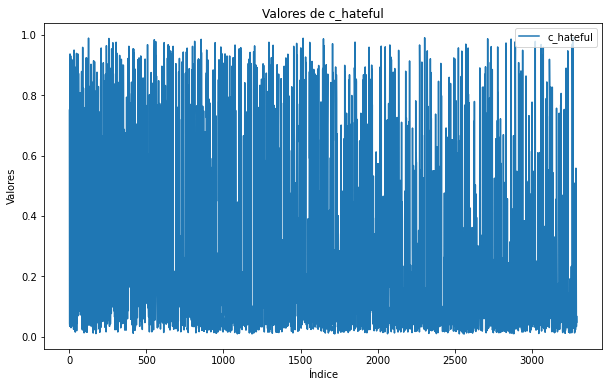

In [49]:
plt.figure(figsize=(10, 6))

plt.plot(df_neg['c_hateful'], label='c_hateful')
# plt.plot(df_neg['targeted'], label='targeted')
# plt.plot(df_neg['aggresive'], label='aggresive')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Valores de c_hateful')
plt.legend()

plt.show()

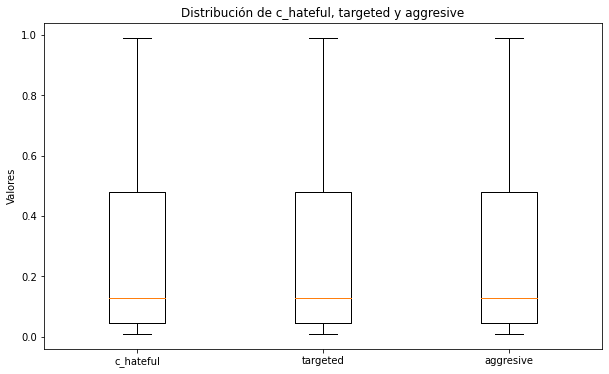

In [41]:
plt.figure(figsize=(10, 6))

plt.boxplot([c_hateful, targeted, aggresive], labels=['c_hateful', 'targeted', 'aggresive'])
plt.ylabel('Valores')
plt.title('Distribución de c_hateful, targeted y aggresive')

plt.show()

In [44]:
df_neg.to_csv('C:/Users/Usuario/Desktop/ID BOOTCAMPS DS/PROGRAMACION/comentarios_negativos_inmigracion_ filtrados.csv')